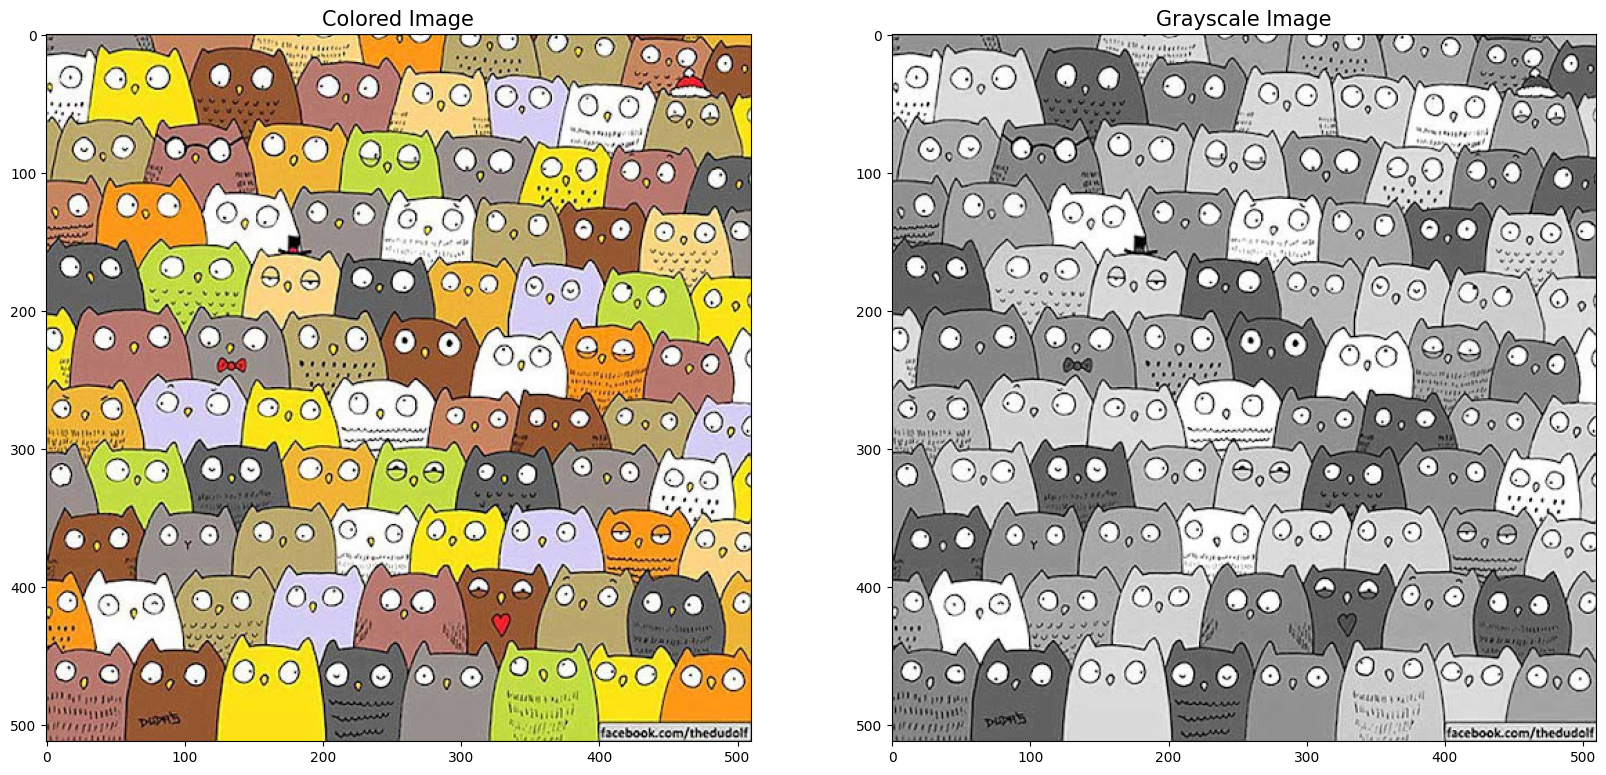

Text(0.5, 1.0, 'Canny Edges of Full Image')

In [80]:
import numpy as np
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage.feature import canny
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Load and convert to grayscale
sample = imread('cat.jpg')
sample_g = rgb2gray(sample)

# Apply Canny edge detection to the grayscale image
edges_full = canny(sample_g, sigma=1)

# Display original and grayscale images
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(sample)
ax[1].imshow(sample_g, cmap='gray')
ax[0].set_title('Colored Image', fontsize=15)
ax[1].set_title('Grayscale Image', fontsize=15)
plt.show()





# Show patch location on the full image and the patch itself with edges

ax[0].imshow(edges_full, cmap='gray')
ax[0].set_title('Canny Edges of Full Image', fontsize=15)

In [81]:
patch2 = imread('/content/template4.jpg')
patch_g2 = rgb2gray(patch2)
edge_patch_2 = canny(patch_g2, sigma=1)

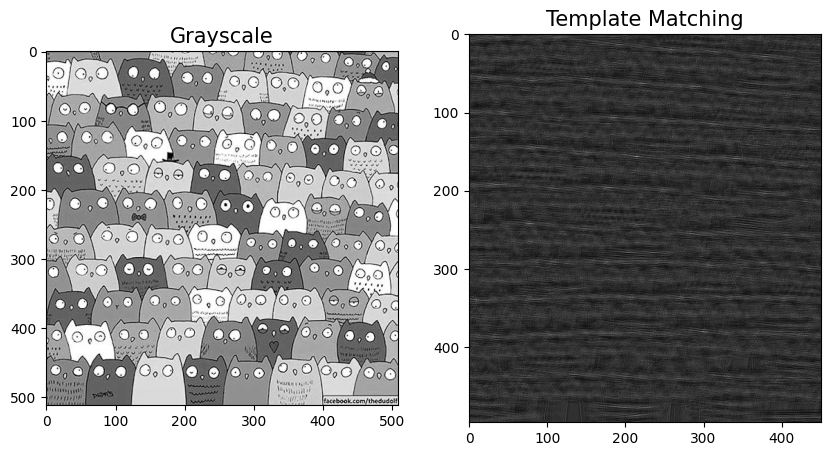

In [82]:
from skimage.feature import match_template
sample_mt = match_template(edges_full, edge_patch_2)
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sample_g,cmap='gray')
ax[1].imshow(sample_mt,cmap='gray')
ax[0].set_title('Grayscale',fontsize=15)
ax[1].set_title('Template Matching',fontsize=15);

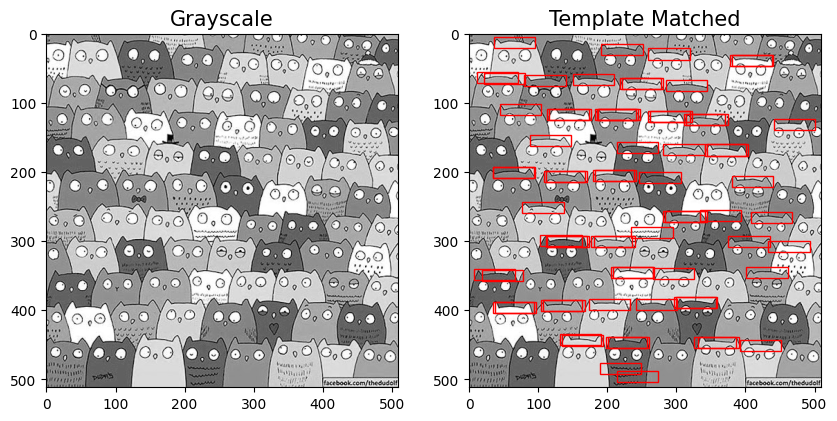

In [87]:
from skimage.feature import peak_local_max
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sample_g,cmap='gray')
ax[1].imshow(sample_g,cmap='gray')
patch_width, patch_height = patch_g2.shape
for x, y in peak_local_max(sample_mt, threshold_abs=0.22):
    rect = plt.Rectangle((y, x), patch_height, patch_width, color='r',
                         fc='none')
    ax[1].add_patch(rect)
ax[0].set_title('Grayscale',fontsize=15)
ax[1].set_title('Template Matched',fontsize=15);